# <b> <p align="center"> <span style="color:	mediumspringgreen "> PyTorch Workflow <span> </p> </b>

- Let's explore an example of PyTorch end-to-end workflow . 


In [1]:
what_we_are_covering={1:"data (prepare and load)",
                      2: "building model",
                      3: "fitting the model to data(training)",
                      4: "marking prediction and evaluation a model (interface) ",
                      5: "saving and loading ",
                      6: "putting it all together"}


what_we_are_covering

{1: 'data (prepare and load)',
 2: 'building model',
 3: 'fitting the model to data(training)',
 4: 'marking prediction and evaluation a model (interface) ',
 5: 'saving and loading ',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np
# Check PyTorch version

torch.__version__

'1.8.1+cu101'

## <b> <p align="center"> <span style="color: lightskyblue "> Data (preparing and loading) <span> </p> </b>

Data can be almost anything ... in machine learning

* Excel speadsheet
* Image of any kind
* Videos (Youtube has lots of data ....)
* Audio like songs or podcasts
* DNA
* Text

Machine leaning is a game of two parts:
  
  1. Get  data into a numerical representation.
  2. Building a model to learn pattern in that numerical representation.


![machine learning is a game of two parts: 1. turn your data into a representative set of numbers and 2. build or pick a model to learn the representation as best as possible](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)


To showcase this , let's create some *Known* data using the linear regression formula.

We'll use a linear regression formula to make straight line with known **parameter**


In [3]:
# Create *Known* parameters 

weight=0.7
bias =0.3

# Create 
start=0
end=1

step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1) # adding an extra 1 dim in Tensor
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [4]:
Y=weight*X + bias

X[:10] , Y[:10] , len(X) , len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [5]:
# plt.plot(X,Y)
# plt.title("Linear Regression")
# plt.xlabel("Values of x")
# plt.ylabel("Vlaues of Y : Y= X*weight + bias")


### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [6]:
# Create a train/test split

train_split=int(0.8 * len(X))

X_train,y_train=X[:train_split], Y[:train_split]

X_test , y_test= X[train_split:],Y[train_split:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

 How might we better visualize our data ?

This is where tha data explorer's moto comes in !

"Visualize , visualize , visualize"

In [7]:
def plot_predictions(train_data=X_train,
                     train_lables=y_train,
                     test_data=X_test,
                     test_lables=y_test,
                     predictions=None):
    
    """
    Plots training data, test data and compares predictions.

    """
    plt.figure(figsize=(10,7))
    
    # Plot training data in blue

    plt.scatter(train_data,train_lables, c="b",s=4, label="Training Data")

    # Plot test data in green 

    plt.scatter(test_data,test_lables, c="g", s=4, label="Testing Data")

    # Are their prediction ?
    if predictions is not None:

        # let's create prediction

        #predictions=test_data*weight + bias
        plt.scatter(test_data, predictions , c="r" , s= 4 , label="Predictions")

    
    # Show the legend 

    plt.legend(prop={"size":14})


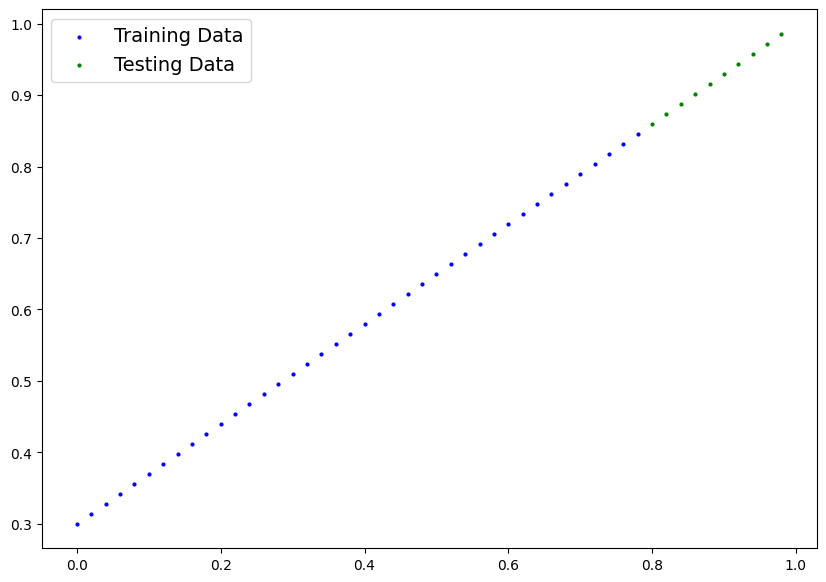

In [8]:
plot_predictions(X_train,y_train,X_test,y_test)

## 2. Building  model

Our first PyTorch model ! 

This is very exciting .... Let's do it !

Beacuse we're going to be building classes through out the course , Can be followed : https://realpython.com/python3-object-oriented-programming/


What our model does :
- start with random values (weight and bias)
- Look at training data and adjust the random values to better represent (or get closer to ) the ideal values ( the weight and bias  values we used to creat the data )

How does it do so ?

1. Gradient descent
2. Backpropagation


In [9]:
# Create linear regression model class

from torch import nn

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)
        

### PyTorch model building essentials

* torch.nn - contain all of the building blocks for computational graphs ( a neural network can be consider as a computational graph).
* torch.nn.Parameter - what parameters will try and learn , often a PyTorch layer from torch.nn will set these for us. 
* torch.nn.Module - The bese class for all neural class module , if you subclass it, it should overwrite forward().
* troch.optim - this were the optimizers in PyTorch live , they will help with gradient descent. 
* def forward() - All nn.Module subclasses require you to overwrite forward() , this method defines what happens in the forward computation

### 

### Checking the contents of our PyTorch model 

Now we've created model , let's see what's inside ....


So we can check our model parameters or what's inside our model using . parameters()



In [10]:
# Create a random seed 

RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)


# Create an instance of the model (this is a subclass of nn.module)

model_0=LinearRegressionModel()

list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

### Makiing prediction using `torch.inference_mode()`  for the newer version >1.9.1

To check our model's predictive power , let's see how well it predicts `y_test` bias on 'X_test`.

When we pass data through our model , it's going to run it through the `forward()` method . 



In [13]:
# Make predictions with model
# with torch.inference_mode(): 
#     y_preds = model_0(X_test)

#Note: in older PyTorch code you might also see torch.no_grad() 
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

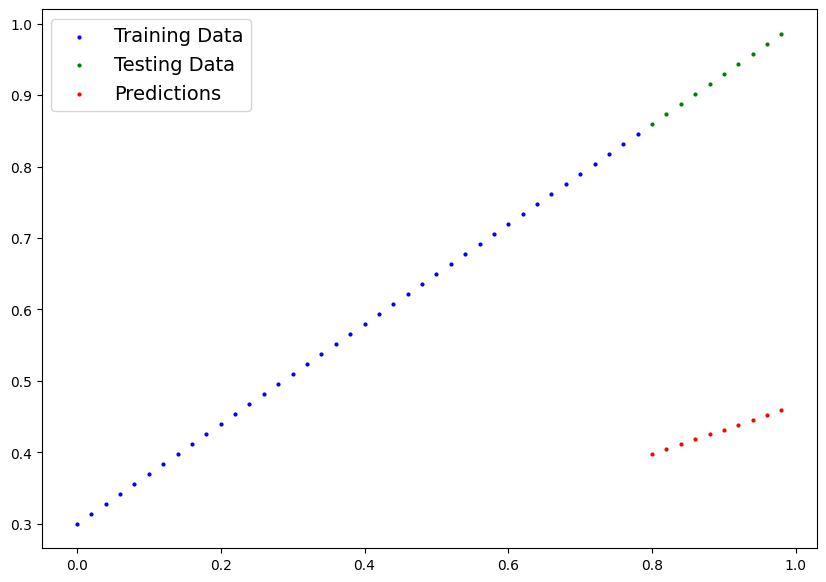

In [15]:
plot_predictions(predictions=y_preds)

### 3. Train Model

- The whole idea of training is for a model to move form some *unknown* parameters (These may be random ) to some *known *. 

- Or in other word from poor representaion of the data to be a better representation of data. 

- One way to messure how poor or wrong your models predicts are is to use loss functions.

* Note : Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train : 


* **Loss function :** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer :** Takes into account the loos of a model and adjust the model's parameters (e.g. weight & bias)


And specially for PyTorch, we need:

* A training loop 
* A testing loop 

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a loss function 

loss_fn=nn.L1Loss()

# Setup an optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop (and a testing loop) in PyTorch

A couple of thing we need in a training loop:


0. loop through the data and do ...
1. Forward pass (this involves data moving through our model's `forward()` functions ) to make predictions on data - also called forward propagation
2. Calculte the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss ( **backpropagation** )
5. Optimizer step - use the optimizer  to adjust our model's parameters to try and improve the loss ( **gradient descent** )


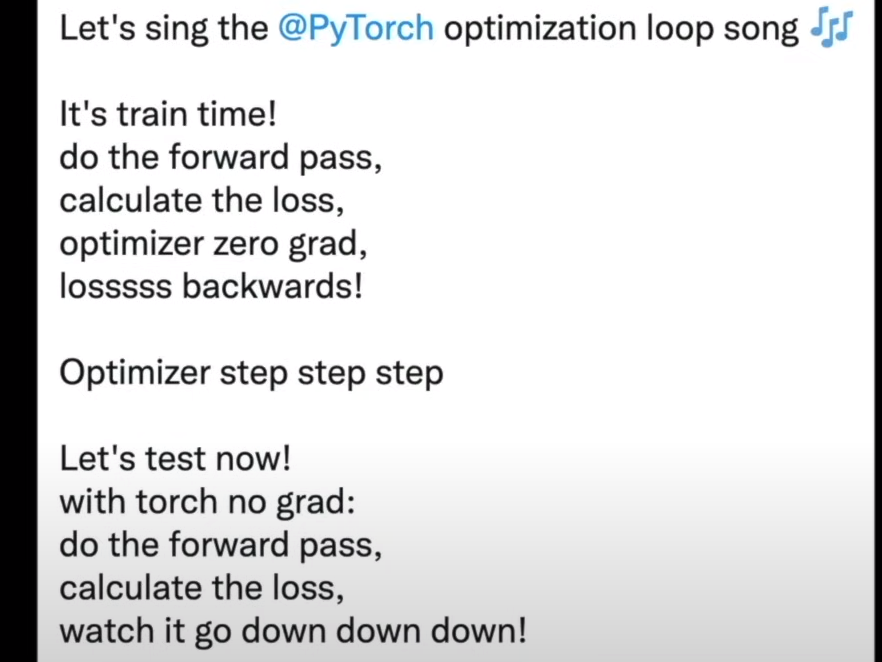

In [19]:
# An epoch is one loop through the data ....( this is a hyperparameter because we've set it by ourselves)

torch.manual_seed(42)



epochs = 201

# Track different values

epoch_count=[]
loss_values=[]
test_loss_values=[]



# 0. loop throug the data 

for epoch in range(epochs):
    # Set the model to training mode 

    model_0.train()  # train mode in PyTorch sets all parameters that requrie gradients to require gradients

    # 1. Forward pass 

    y_pred=model_0(X_train)


    # 2. calculate the loss

    loss=loss_fn(y_pred,y_train)  # input and expected 

    #print(f"loss : {loss}")

    # print(loss)
    # print(model_0.state_dict())

    # 3. Optimizer zero grad

    optimizer.zero_grad()

    
    # 4. Perform backpropagation on the loss with respect to the parameter of the model

    loss.backward()


    # 5. Step the optimizer (perform gradient descent)

    optimizer.step()


    ### Testing 

    model_0.eval() # turns off different setting in the model not needed for evaluation/testing 

    with torch.no_grad():

        # 1. Do the forward pass 

        test_pred = model_0(X_test)

        # 2. calculate the loss 

        test_loss= loss_fn(test_pred,y_test)

    # Print out what's happening'

    if epoch % 10 == 0:

        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f" Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")

        # print out model state dict 

        print(model_0.state_dict())

        #plot_predictions(predictions=test_pred)




    #model state_dict()

    model_0.state_dict()

 Epoch : 0 | Loss : 0.31288138031959534 | Test Loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
 Epoch : 10 | Loss : 0.1976713240146637 | Test Loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
 Epoch : 20 | Loss : 0.08908725529909134 | Test Loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
 Epoch : 30 | Loss : 0.053148526698350906 | Test Loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
 Epoch : 40 | Loss : 0.04543796554207802 | Test Loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
 Epoch : 50 | Loss : 0.04167863354086876 | Test Loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
 Epoch : 60 | Loss : 0.03818932920694351 | Test Loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116

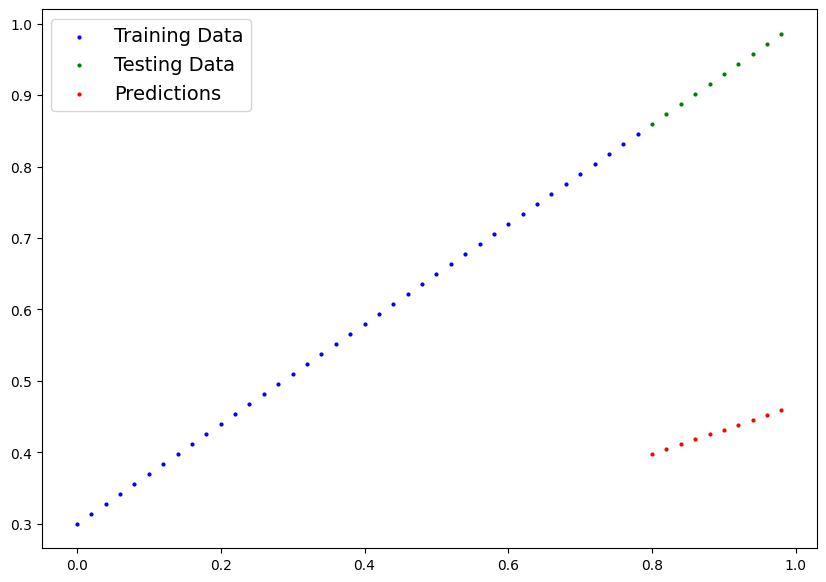

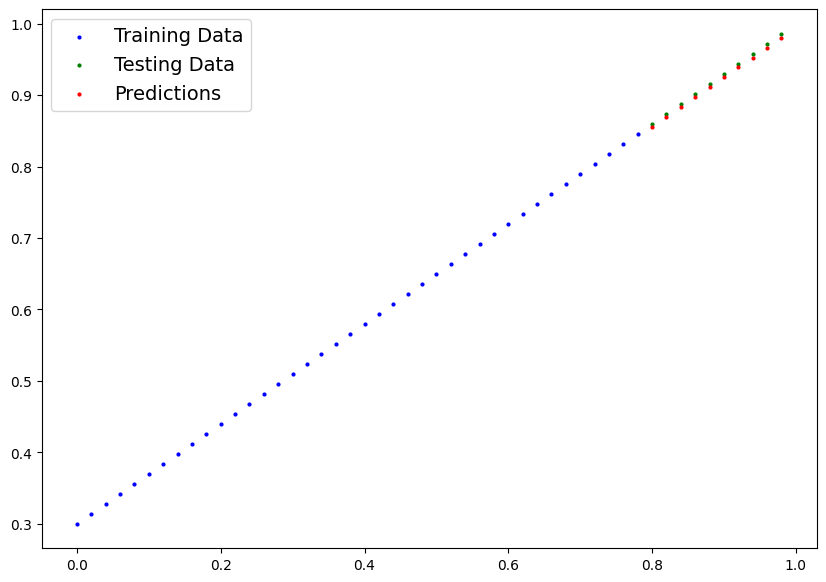

In [20]:
plot_predictions(predictions=y_preds)
plot_predictions(predictions=test_pred)

In [21]:
# converting torch to numpy array
loss_values=np.array(torch.tensor(loss_values).numpy())

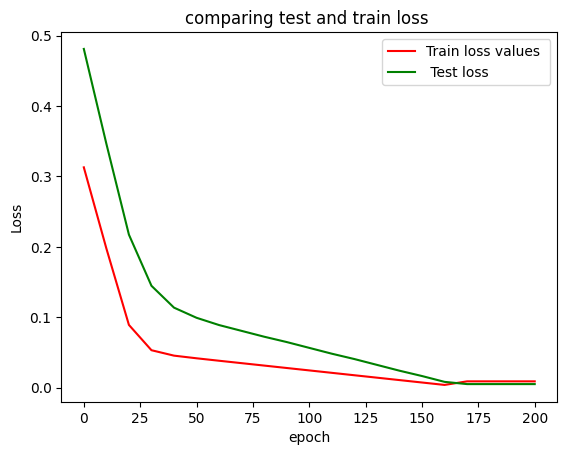

In [22]:
# plot the loss curves 

plt.plot(epoch_count, loss_values, label="Train loss values ", c="r") 
plt.plot(epoch_count,test_loss_values , label= " Test loss " , c="g" )
plt.title("comparing test and train loss ")
plt.ylabel('Loss')
plt.xlabel("epoch")
plt.legend()


## Saving a model in PyTorch 

There are three main methods you should about for saving loading models in PyTorch : 

1. `torch.save() `  - allow to save a PyTorch object in python's pickle format

2. `torch.load()`   - allow to load a saved PyTorch object

3. ` torch.nn.Module.load_state_dict()` - allow to load a model's saved state dictionary 

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [24]:
#Saving our PyTorch model 

from pathlib import Path


# 1. Create models directory 

MODEL_PATH = Path("models")

MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. create model save path

MODEL_NAME="01_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 

MODEL_SAVE_PATH 

# 3. save the model state_dict()

print(f" Saving the model to the path : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH )



 Saving the model to the path : models\01_pytorch_workflow_model_0.pth


In [25]:
ls -l models

 Volume in drive F has no label.
 Volume Serial Number is 8BDB-9343

 Directory of f:\DL_with_PyTorch\TorchNoteBook


 Directory of f:\DL_with_PyTorch\TorchNoteBook\models

04/24/2024  11:44 AM    <DIR>          .
04/24/2024  12:30 PM    <DIR>          ..
04/24/2024  10:08 PM             1,151 01_pytorch_workflow_model_0.pth
04/24/2024  11:44 AM             1,215 01_pytorch_workflow_model_1.pth
               2 File(s)          2,366 bytes
               2 Dir(s)  195,971,842,048 bytes free


File Not Found


## Loading a PyTorch model

Since we saved our model' `state_dict()` rather the entire model , we'll create a new instance of our model class and load the saved state_dict() into that. 

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [27]:
# To load in a saved state_dict we have to instantiate a new instance of our model class 

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 ( this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [29]:
# Make some prediction with our loaded model

loaded_model_0.eval()

with torch.no_grad():

    loaded_model_preds=loaded_model_0(X_test)


loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [30]:
# Compare loaded model with original model preds

test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

  ## <span style="color:blueviolet "> 6. Putting it all together  </span> 

  Let's go back through the steps above and see it all in one place 

In [31]:
# importing PyTorch and matplotlib

import torch
from torch import nn

import matplotlib.pyplot as plt

# Check PyTorch version

torch.__version__

'1.8.1+cu101'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing). 

If no GPU is available, the code will default to using CPU. 

In [32]:
# Setup device agnostic code 

device= "cuda" if torch.cuda.is_available() else "cpu"

print(f"using device is : {device}")

using device is : cuda


### 6.1 Data 

In [33]:
# Create some data using the linear regression formula , Y = weight * X + bias

weight=0.7
bias = 0.3 


# Create range values

start=0
end=1
step=0.02

# Create X and Y ( features and labels)
 
Data=torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze , errors will be pop up 

result= weight*Data + bias

Data[:10] , result[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
# Split data 

train_split_len=int(0.8 * len(Data))

X_train_Data=Data[:train_split_len]
y_train_Data=result[:train_split_len]
X_test_Data=Data[train_split_len:]
y_test_Data=result[train_split_len:]

len(X_train_Data) , len(y_train_Data) , len(X_test_Data) , len(y_test_Data)


(40, 40, 10, 10)

In [35]:
# Plot the data 

# Note : if you don't have the plot_prediction() function loaded, this will error 


def drawData_as_plot_prediction(train_data=X_train_Data,
                                train_label=y_train_Data,
                                test_data=X_test_Data,
                                test_label=y_test_Data,
                                prediction=None):
    

    """ Ploting the data in three parts 
     1. Train 
     2. Test
     3. Prediction

    """
    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_label,c="b",s=4,label="Train Data")

    plt.scatter(test_data,test_label,c="g",s=4,label="Test Data")

    if prediction is not None:
        plt.scatter(test_data,prediction,c="r",s=4,label="Prediction Data")

    

    plt.legend(prop={"size":14})



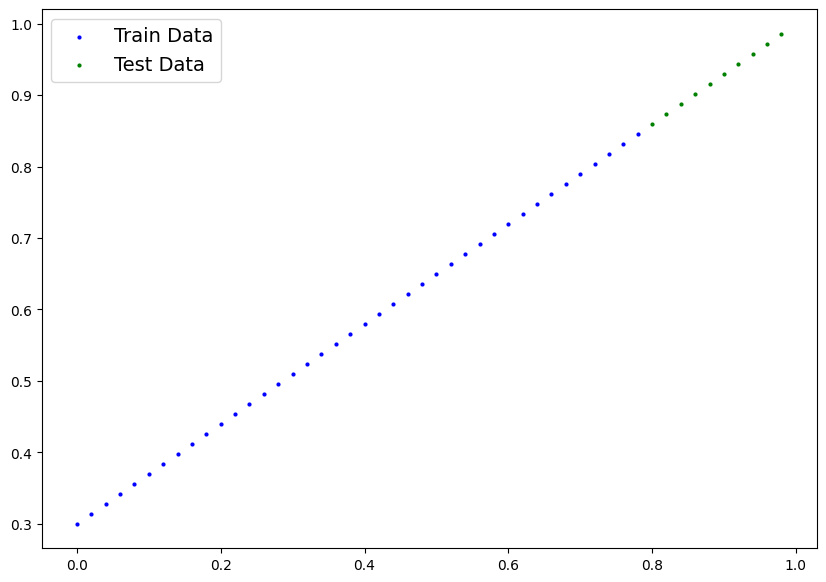

In [36]:
drawData_as_plot_prediction() # the parameter are defined before 

### 6.2 Building a PyTorch Linear model

In [37]:
# Create a linear model by subclass nn.module 

class LinearRegressionModelV2(nn.Module):

    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating model parameters / also called: linear transform , probing layer, fully connected layer , dense layer 
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)



    def forward(self,x:torch.Tensor) ->torch.Tensor:
        return self.linear_layer(x)

In [38]:
# Set the manual seed 

torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [39]:
#Check the model current device 

next(model_1.parameters()).device

device(type='cpu')

In [40]:
# Set the model to use the target device 

model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [41]:
# Put data on proper device

X_train_Data=X_train_Data.to(device)
y_train_Data=y_train_Data.to(device)
X_test_Data=X_test_Data.to(device)
y_test_Data=y_test_Data.to(device)




### 6.3 Training 

For Training we need:

* Loss Function
* Optimizer 
* Training loop
* Testing loop

In [42]:
# Setup loss function

lossFunction=nn.L1Loss()

# Setup for Optimizer

optimizerFunction=torch.optim.SGD(params=model_1.parameters(),lr=0.01 )

Epoch : 0 | TrainingLoss : 0.5551779866218567   | TestLoss : 0.5739762187004089
Epoch : 10 | TrainingLoss : 0.439968079328537   | TestLoss : 0.4392664134502411
Epoch : 20 | TrainingLoss : 0.3247582018375397   | TestLoss : 0.30455657839775085
Epoch : 30 | TrainingLoss : 0.20954833924770355   | TestLoss : 0.16984669864177704
Epoch : 40 | TrainingLoss : 0.09433845430612564   | TestLoss : 0.03513690456748009
Epoch : 50 | TrainingLoss : 0.023886388167738914   | TestLoss : 0.04784907028079033
Epoch : 60 | TrainingLoss : 0.019956795498728752   | TestLoss : 0.045803118497133255
Epoch : 70 | TrainingLoss : 0.016517987474799156   | TestLoss : 0.037530567497015
Epoch : 80 | TrainingLoss : 0.013089174404740334   | TestLoss : 0.02994490973651409
Epoch : 90 | TrainingLoss : 0.009653178043663502   | TestLoss : 0.02167237363755703
Epoch : 100 | TrainingLoss : 0.006215683650225401   | TestLoss : 0.014086711220443249
Epoch : 110 | TrainingLoss : 0.00278724217787385   | TestLoss : 0.005814164876937866
Ep

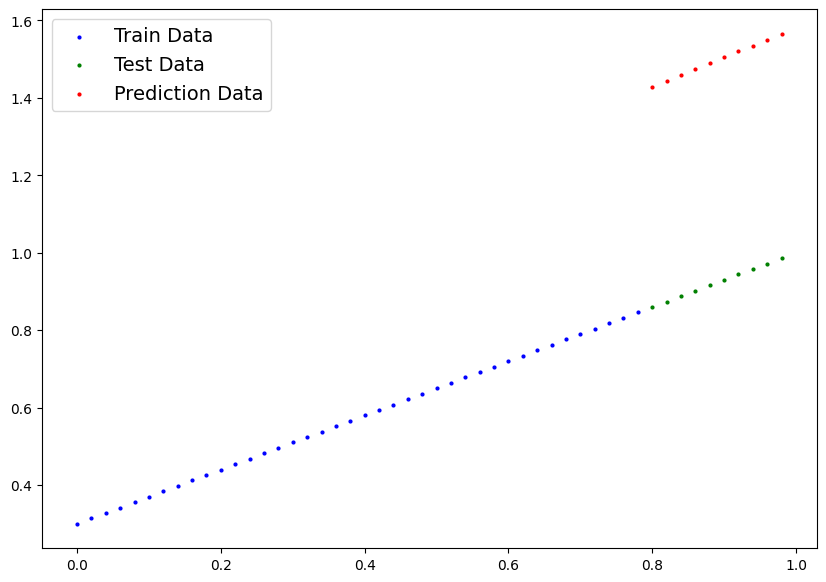

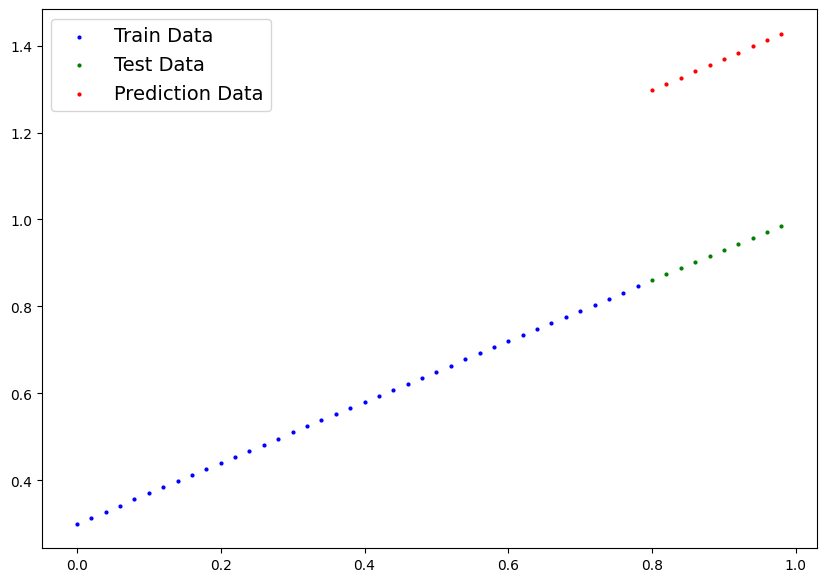

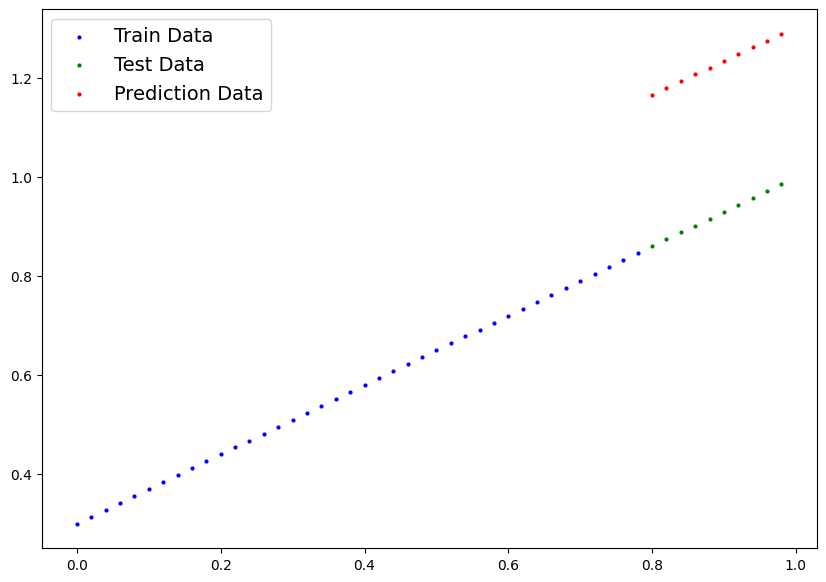

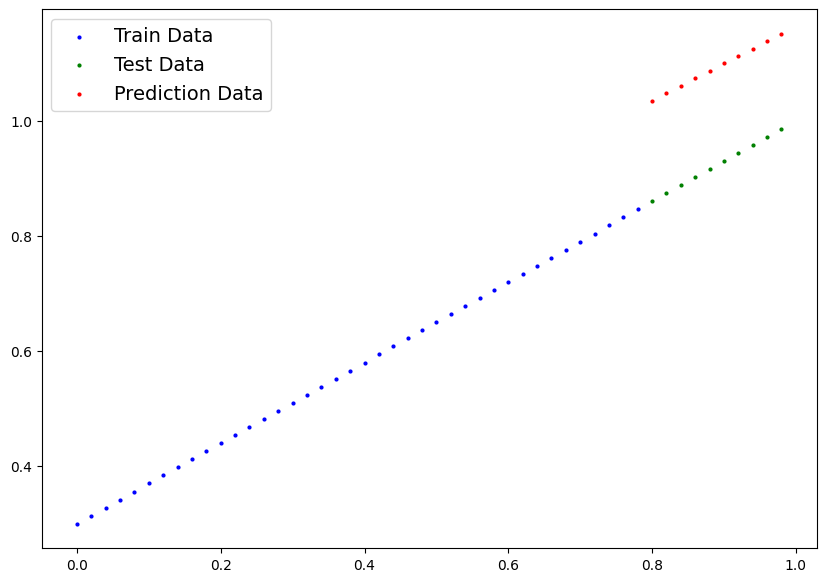

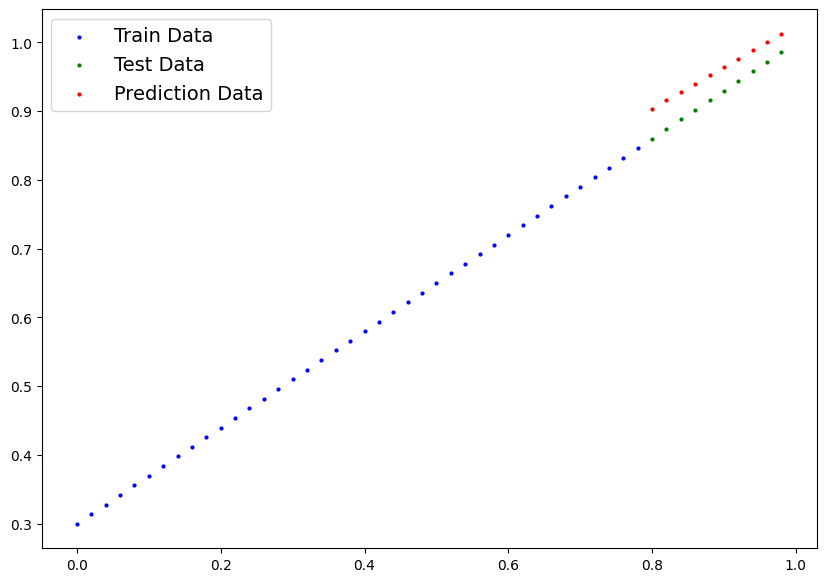

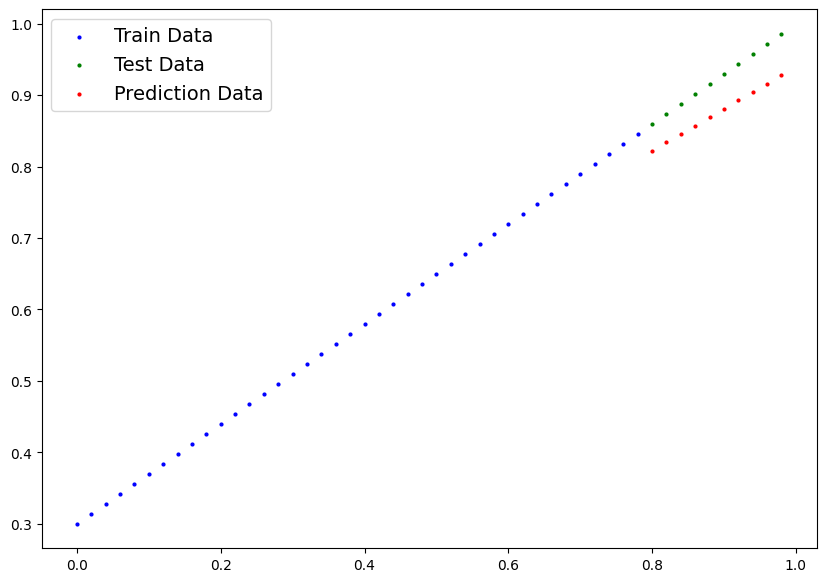

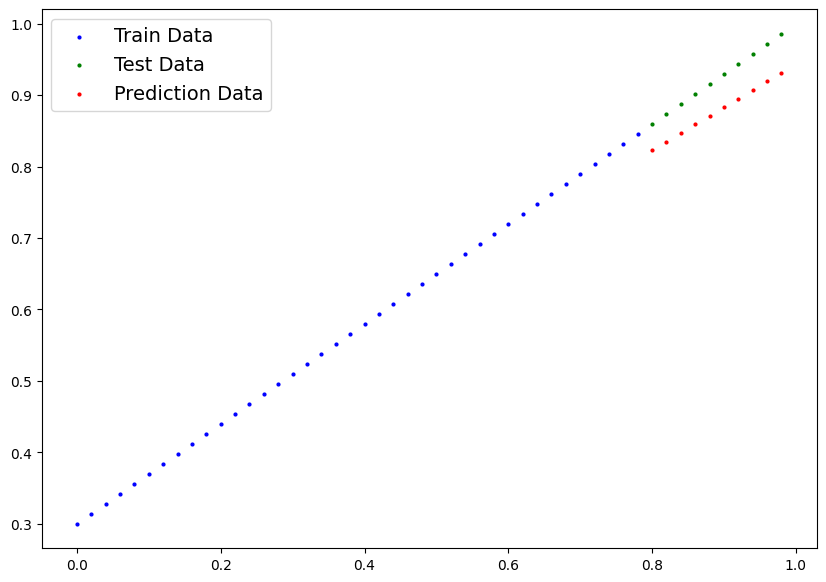

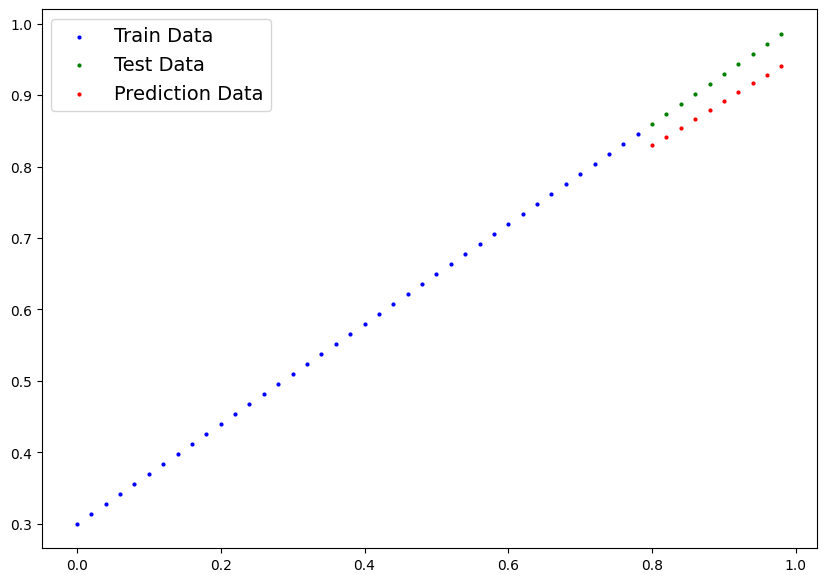

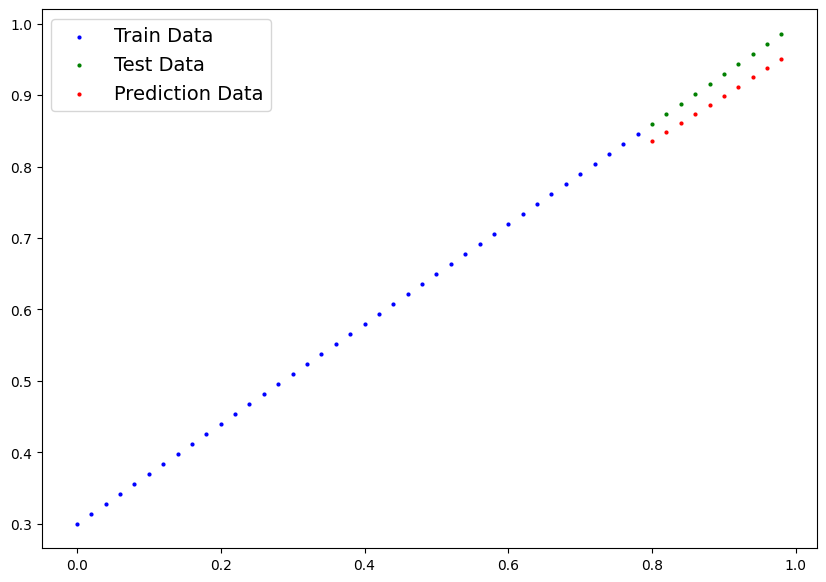

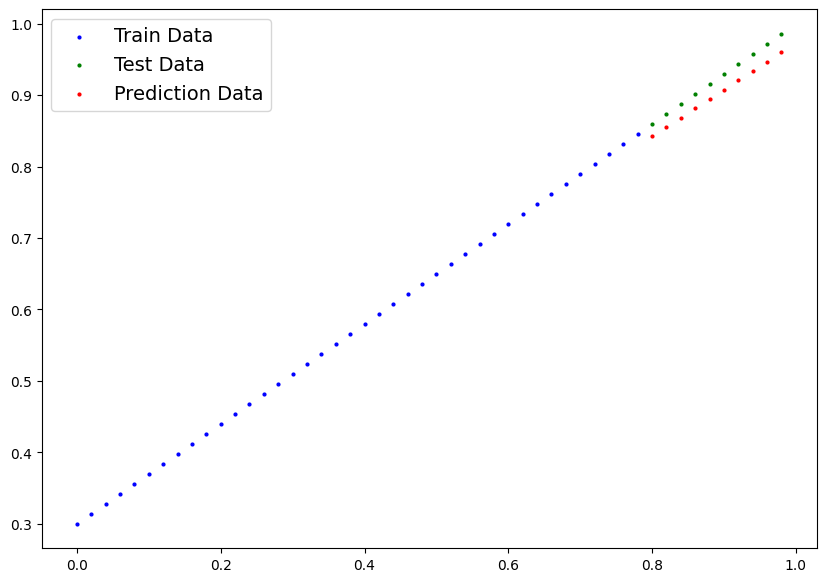

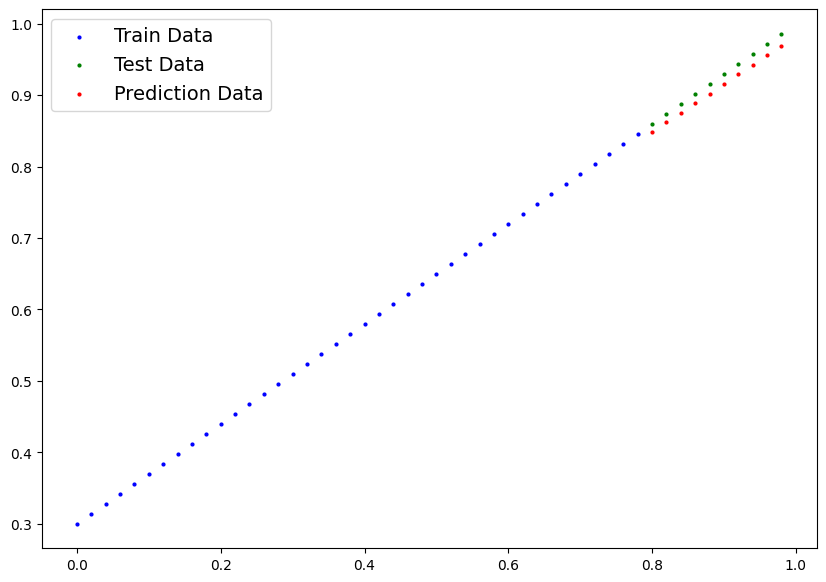

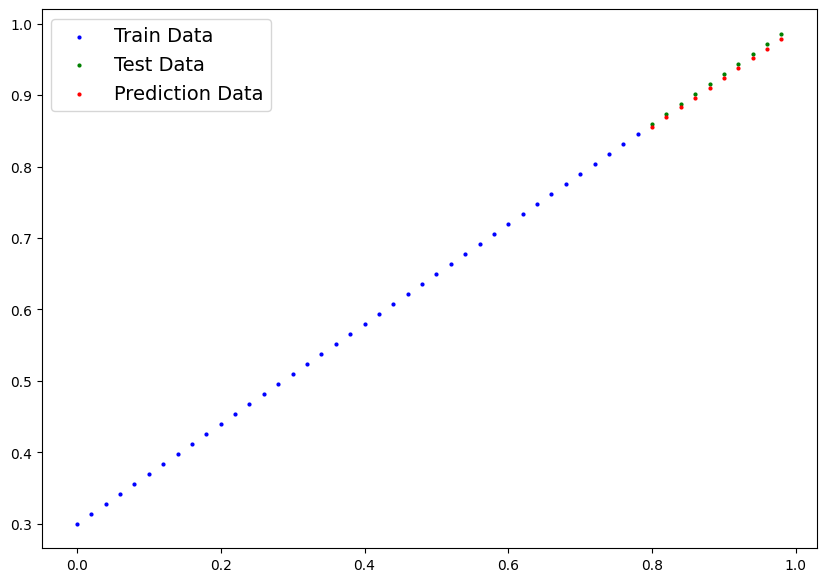

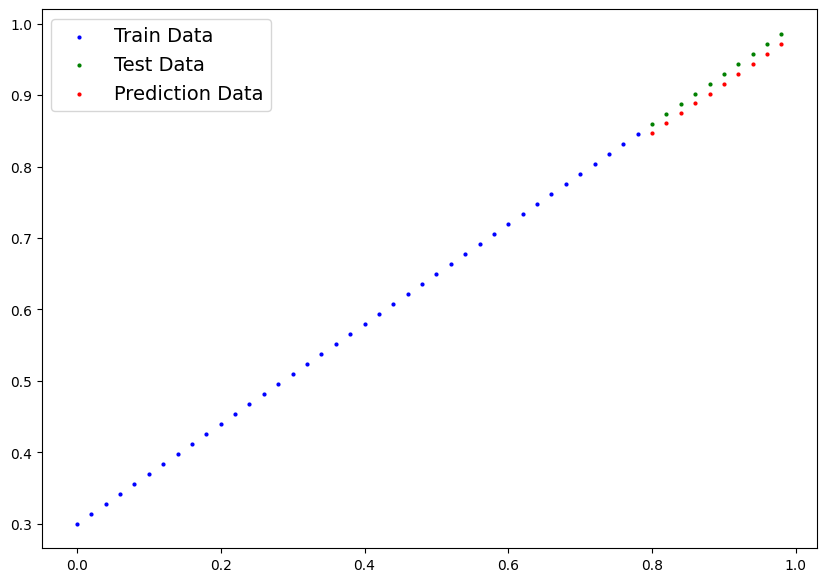

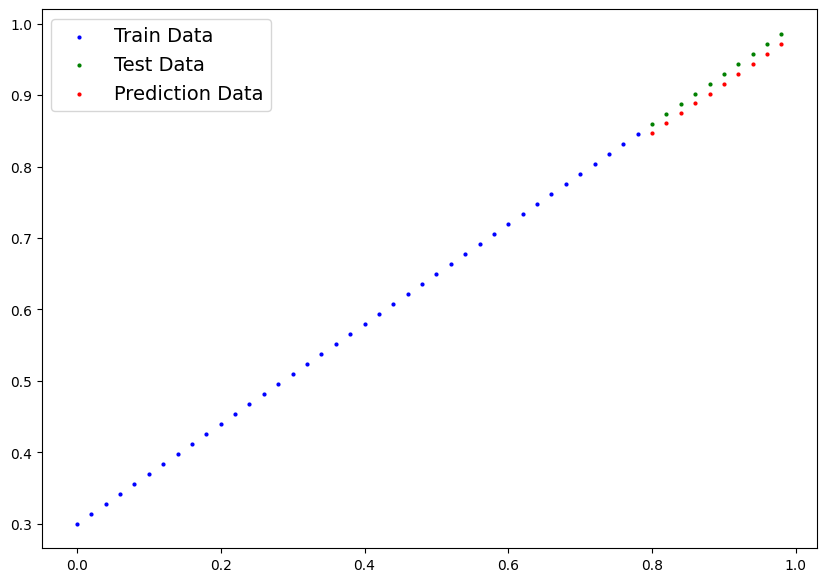

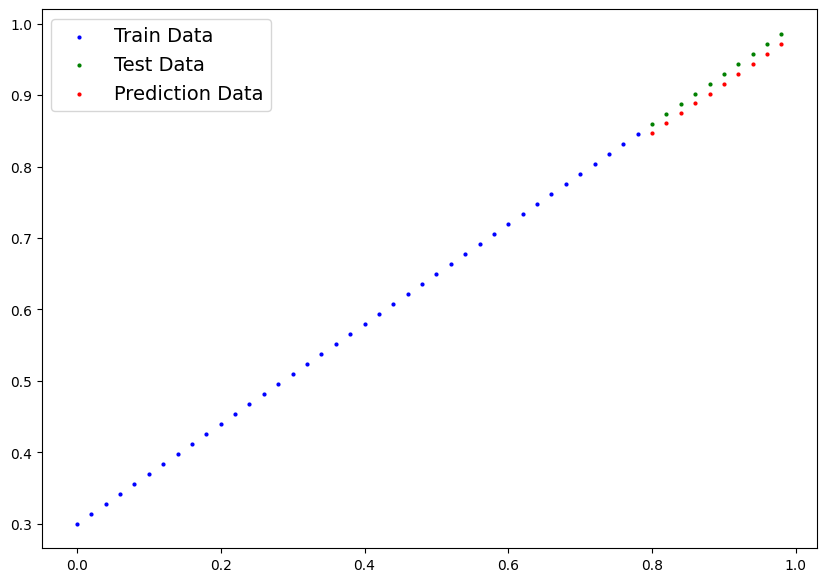

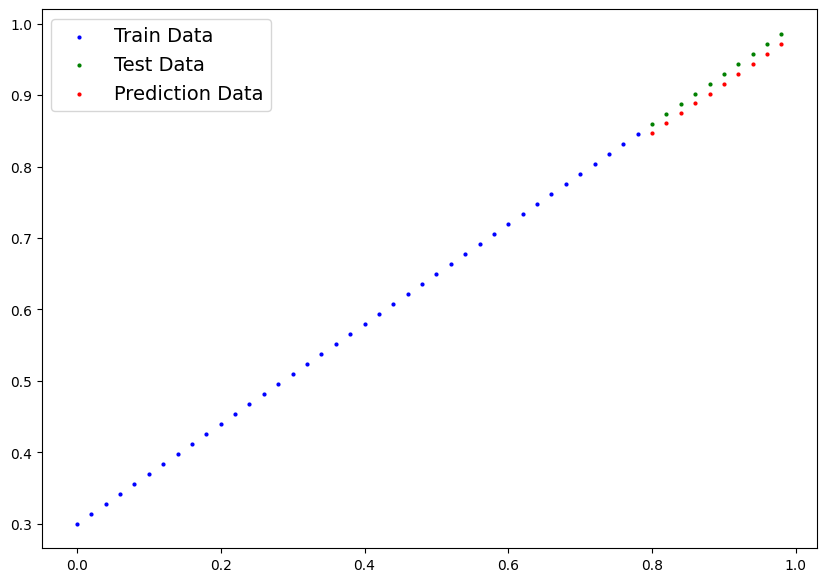

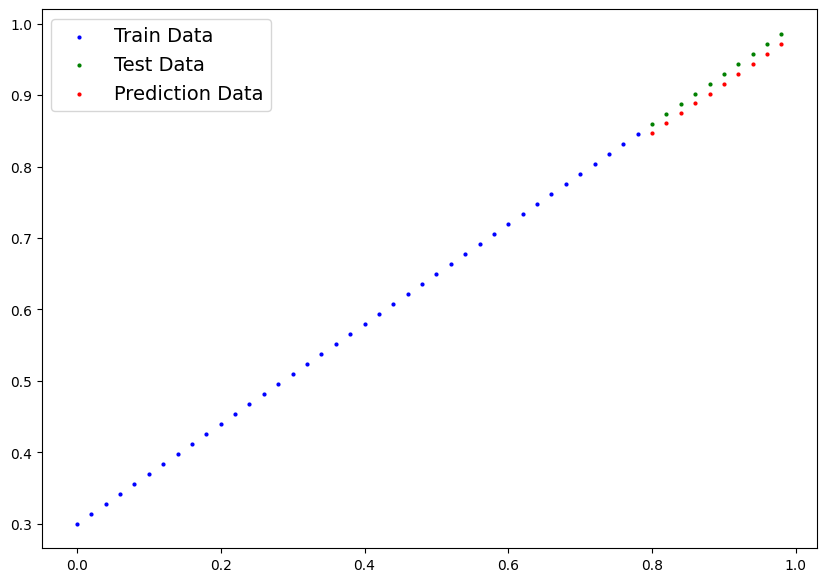

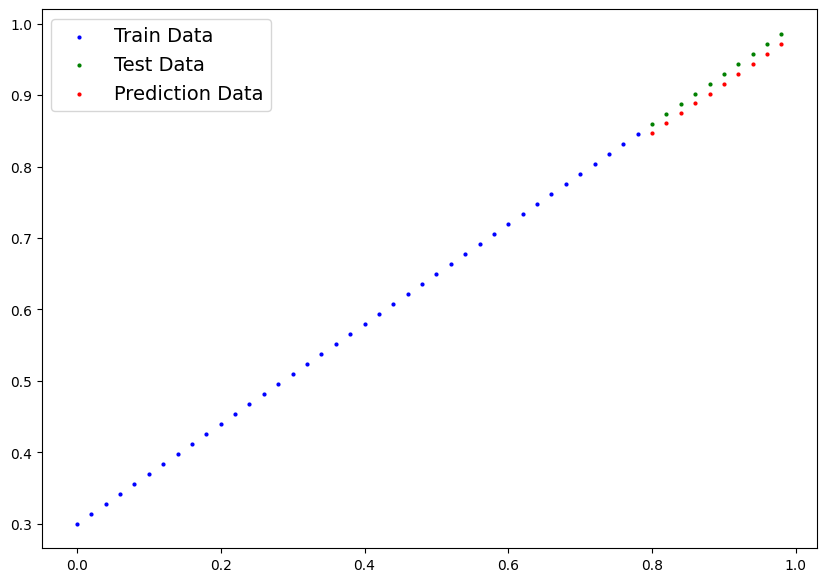

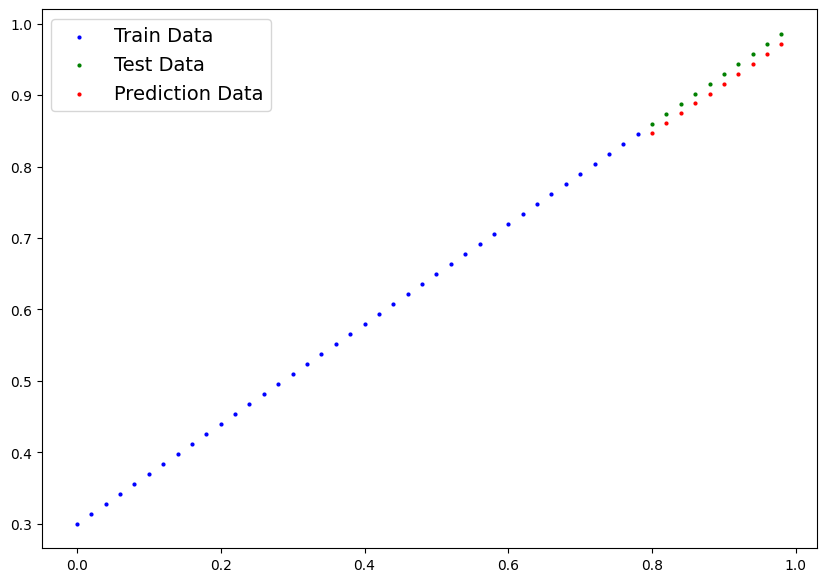

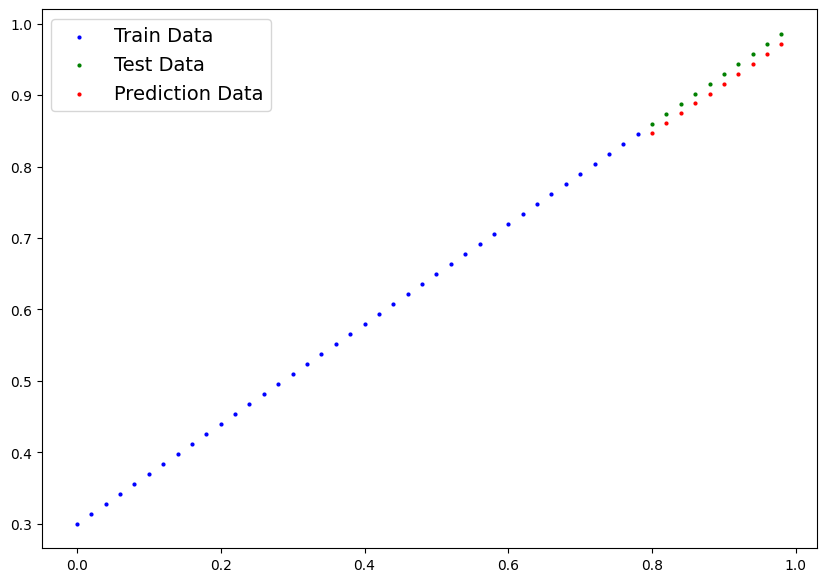

In [43]:
# Let's write a traing loop

torch.manual_seed(42)

epochs=200

for epoch in range(epochs):

    model_1.train()

    # 1. Forward pass

    y_pred_data=model_1(X_train_Data)

    # 2. calculate the loss 

    trainLossValue=lossFunction(y_pred_data,y_train_Data)

    # 3. optimizer zero grad

    optimizerFunction.zero_grad()

    
    # 4. Perform backpropagation

    trainLossValue.backward()

    # 5. Optimizer step()

    optimizerFunction.step()



    ### Testing

    model_1.eval()

    with torch.no_grad():

        test_pred_value=model_1(X_test_Data)
    
        testLossValue=lossFunction(test_pred_value,y_test_Data)

    
    # Print what's happening


    if epoch %10 ==0:
        
        print(f"Epoch : {epoch} | TrainingLoss : {trainLossValue}   | TestLoss : {testLossValue}")
        drawData_as_plot_prediction(prediction=test_pred_value.cpu())






In [44]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [45]:
type(y_test_Data)

torch.Tensor

In [46]:
type(test_pred_value)

torch.Tensor

### 6.4 Making and evaluating prediction

In [47]:
# Turn model into evaluation mode 

model_1.eval()

# make prediction on the test data

with torch.no_grad():
    predicted_data=model_1(X_test_Data)

predicted_data

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

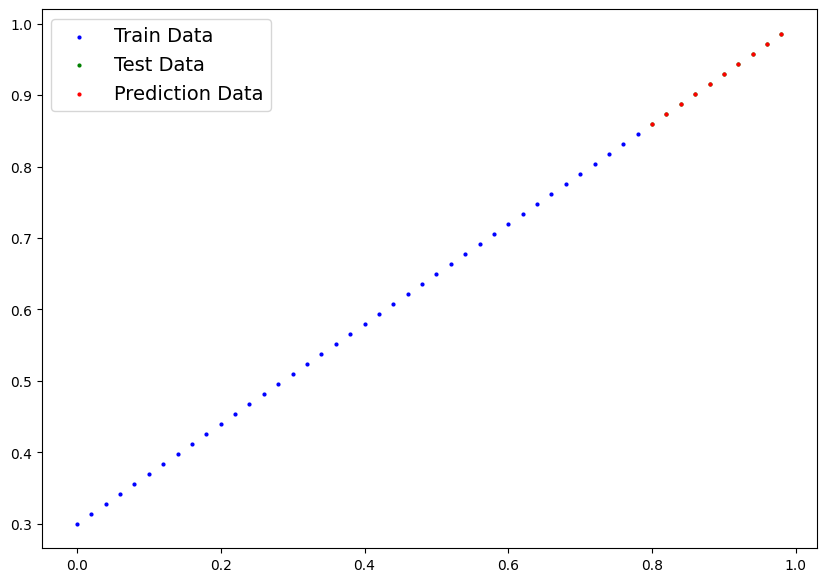

In [48]:
# Check out our model prediction visually 

drawData_as_plot_prediction(prediction=predicted_data.cpu())

### 6.5 Saving and loading a trained model

In [49]:
from pathlib import Path

# 1. Create models directory

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path

MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME


# 3. Save the model state dict

print(f" Saving model to : {MODEL_SAVE_PATH}")

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

 Saving model to : models\01_pytorch_workflow_model_1.pth


In [50]:
# Load a PyTorch


loaded_model_1=LinearRegressionModelV2()


# Load the saved modle_1 state_dict

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


# Put the loaded model to device

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

tensor(0.0003, device='cuda:0')


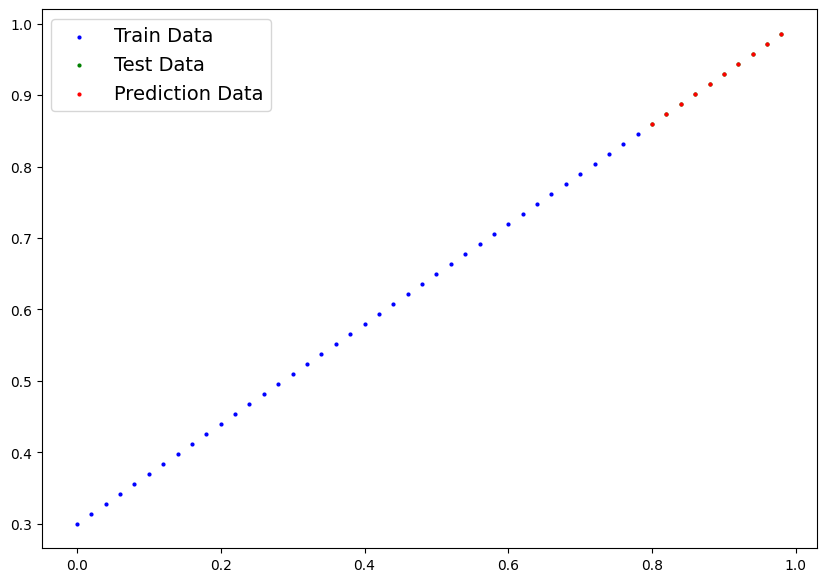

In [51]:
# Eavaluate the loadeModel

loaded_model_1.eval()

with torch.no_grad():
    loaded_model_1_predict=loaded_model_1(X_test_Data)
    loaded_model_1_lossValue=lossFunction(loaded_model_1_predict,y_test_Data)
    print(loaded_model_1_lossValue)

drawData_as_plot_prediction(prediction=loaded_model_1_predict.cpu())